<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

<div class="header">
D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Ripasso.
</div>
<hr style="width: 90%;" align="left" />

<div style="font-size: 30px; font-weight: bold;">Esercitazione di ripasso</div>

**Esercizio 1**

Sia $X$ una variabile aleatoria di Poisson, e sia $\lambda$ il numero medio di eventi che accadono in un intervallo di ampiezza prefissata. (Ricorda il processo di Poisson)

**Punto 1**

1. Quali valori può assumere $X$?
2. Si esprima, in funzione di $\lambda$, la probabilità $p_X(k) = \mathrm P(X=k)$ che accadano esattamente $k$ eventi nell'intervallo considerato.
3. Si esprimano, in funzione di $\lambda$, il valore atteso e la varianza di $X$.


**Svolgimento**

**1.1** _Quali valori può assumere $X$?_

Una variabile di Poisson può assumere come specificazioni tutti i valori interi, zero incluso.

**1.2** _Si esprima, in funzione di $\lambda$, la probabilità $p_X(k) = \mathrm P(X=k)$ che accadano esattamente $k$ eventi nell'intervallo considerato._

$$p_X(k) = \mathrm P(X=k) = \frac{\mathrm e^{-\lambda} \lambda^k}{k!} \mathrm I_{\mathbb N \cup \{ 0 \} } (k)$$

**1.3** _Si esprimano, in funzione di $\lambda$, il valore atteso e la varianza di $X$._

$$\mathcal E(X) = \lambda$$

$$\mathrm{Var}(X) = \lambda$$

**Punto 2**

Fissiamo, **solo in questo punto**, $\lambda=5$.

1. Si tracci il grafico della funzione massa di probabilità di $X$.
2. Si calcoli la probabilità che $X$ assuma valori maggiori di 6.
3. Si determini il più piccolo valore di $X$, chiamiamolo $x_{0.8}$, tale che $P(X \leq x_{0.8}) \geq 0.8$.

**Svolgimento**

**2.1**
_Si tracci il grafico della funzione massa di probabilità di $X$._

Attrezziamoci per calcolare i valori di $p_X$ definendo una funzione `p_poisson` che accetta come argomenti una specificazione (quindi un valore intero non negativo) e un parametro (quindi un valore reale positivo) per un generico modello di Poisson.

In [6]:
%matplotlib inline

import math
import matplotlib.pyplot as plt

# con lambda > di 1 avrò due valori modal.

def p_poisson(x, l):
    return l**x * math.exp(-1 * l) / math.factorial(x)

Avendo $X$ un supporto infinito, sarà necessario generare il grafico richiesto solo parzialmente. Fissiamo quindi il parametro a 5 e generiamo un grafico a bastoncini relativo alla massa di probabilità delle prime quindici specificazioni.

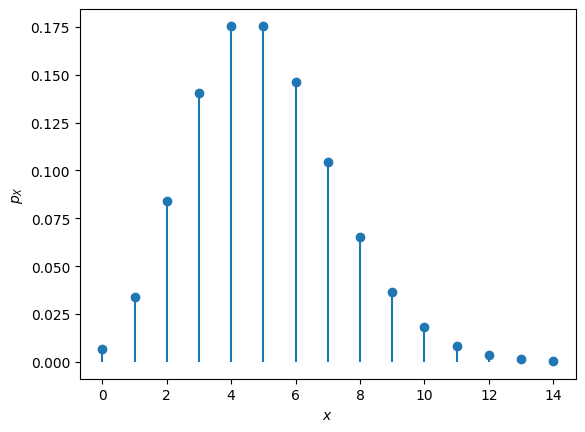

In [7]:
l = 5
x = range(15) #selezionabile fissando un livello di quantile sufficentemente alto (0,95) e calcolare l'inverso della di ripartizione. 
#np.arange(0,int(X.ppf(0.99)+1)) +1 perchè il range va da 0 a secondo estremo escluso 
p_x = list(map(lambda _: p_poisson(_, l), x))
plt.vlines(x, [0]*len(x), p_x)
plt.plot(x, p_x, 'o')
plt.xlabel('$x$')
plt.ylabel('$p_X$')
plt.show()

Possiamo ottenere lo stesso grafico utilizzando il package `scipy.stats`. Tale package permette di istanziare un oggetto che corrisponde a una distribuzione, per poi invocare su di esso dei metodi che ne calcolano la funzione di massa di probabilità (o di densità di probabilità) oppure la funzione di distribuzione cumulativa. Normalmente il nome della classe da istanziare equivale a quello della distribuzione considerata. È questo il caso della distribuzione di Poisson, il cui costruttore accetta come argomento il valore del corrispondente parametro. Seguendo la notazione vista a lezione, useremo `X` come nome della variabile che si riferisce alla distribuzione e `x` per le sue possibili specificazioni.

In [8]:
import scipy.stats as st

X = st.poisson(l)

Il calcolo della funzione di massa di probabilità viene effettuato invocando il metodo `pmf`, a cui passare una specificazione, oppure una lista o un array di specificazioni: la funzione restituirà un valore nel primo caso e un array nei casi rimanenti.

In [9]:
X.pmf(x)

array([0.00673795, 0.03368973, 0.08422434, 0.1403739 , 0.17546737,
       0.17546737, 0.14622281, 0.10444486, 0.06527804, 0.03626558,
       0.01813279, 0.00824218, 0.00343424, 0.00132086, 0.00047174])

Utilizzando `matplotlib` possiamo anche visualizzare parzialmente i grafici delle funzioni di massa di probabilità e di distribuzione cumulativa.

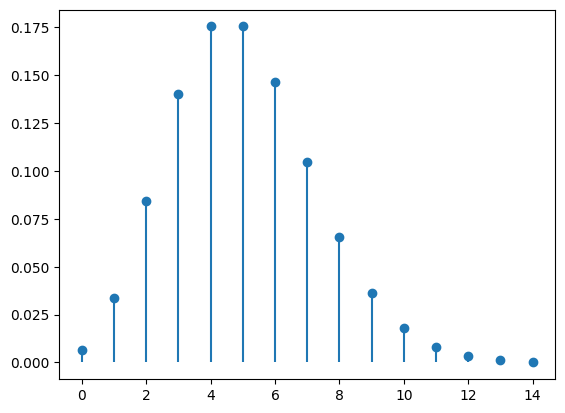

In [10]:
plt.vlines(x, 0, X.pmf(x))
plt.plot(x, X.pmf(x), 'o')
plt.show()

**2.2**
_Si calcoli la probabilità che $X$ assuma valori maggiori di 6._

Sfruttiamo il fatto che $\mathrm P(X > 6) = 1 - \mathrm P(X \leq 6)$:

In [11]:
1- sum([X.pmf(i) for i in range(7)])

0.23781653702706163

In [12]:
1 - X.cdf(6)

0.2378165370270613

**2.3**
_Si determini il più piccolo valore di $X$, chiamiamolo $x_{0.8}$, tale che $P(X \leq x_{0.8}) \geq 0.8$._

Siccome $P(X \leq x) \geq 0.8$ equivale a $F_X(x) \geq 0.8$, un modo operativo per trovare il valore di $x_{0.8}$ è quello di calcolare la funzione di ripartizione di $X$ per valori crescenti delle specificazioni, fermandosi la prima volta che si supera 0.8. Per calcolare agevolmente $F_X$ si può invocare il metodo `cdf` sulla variabile `X` precedentemente definita.

In [13]:
x = 0
while X.cdf(x) < 0.8:
    x +=1

print(x)

7


Pertanto $x_{0.8}=7$. Per essere sicuri di non avere fatto errori basta calcolare $F_X(6)$ e $F_X(7)$ e verificare che i due valori risultano rispettivamente minore e maggiore di 0.8.

In [14]:
(X.cdf(6), X.cdf(7))

(0.7621834629729387, 0.8666283259299925)

Si verifica facilmente che il valore richiesto corrisponde al quantile 0.8 di $X$, che può quindi essere facilmente calcolato utilizzando il metodo `ppf` di `scipy.stats`.

In [15]:
X.ppf(0.8) # calcolo i quantili

7.0

<div class="alert alert-info">Il package non mette a disposizione metodi per il calcolo esplicito di percentili, quartili o decili, che però si possono ottenere facilmente in termini del corrispondente quantile: per esempio il 34-esimo percentile coincide con il quantile 0.34, il sesto decile coincide con il quantile 0.6 e così via.</div>

**Punto 3**

Dati $a, b \in \mathbb R$, sia $Y=a \cdot X-b$. Si esprimano, in funzione di $\lambda$, $a$ e $b$, il valore atteso e la varianza di $Y$.

**Svolgimento**

Sfruttando la linearità del valore atteso si ottiene

$$\mathcal E(Y) = \mathcal E(a \cdot X - b) = a \mathcal E(X) - b = \lambda a - b.$$

Analogamente, applicando le proprietà della varianza si ricava

$$\mathrm{Var}(Y) = \mathrm{Var}(a \cdot X - b) = a^2 \mathrm{Var}(X) = \lambda a^2.$$

**Esercizio 2**

Un'azienda  è proprietaria di alcune sorgenti di alta montagna.
L'azienda ha da poco acquistato un dispositivo per il filtraggio dell'acqua, che filtra 5 litri di acqua per volta e, per ogni operazione, registra su un file alcune informazioni tra cui il nome della sorgente dalla quale è stata prelevata l'acqua, la durezza dell'acqua analizzata, il numero di particelle riscontrate di alcuni elementi (per esempio magnesio, sodio, oro, argento, ferro, piombo, iodio). Dalle prime prove di utilizzo si è notato con sorpresa che, nel file prodotto dal dispositivo, la colonna corrispondente all'oro non contiene sempre il valore zero, quindi nell'acqua si possono trovare tracce di oro.

Il file `ComposizioneAcqua.csv` (contenuto nella directory `data`) contiene i dati che siamo interessati ad analizzare. Ecco la descrizione degli attributi:

- _NomeSorgente_: nome della sorgente dalla quale è stata prelevata l'acqua;
- _Oro_: numero di particelle di oro riscontrate in 5 litri di acqua;
- _DurezzaAcqua_: durezza dell'acqua (indice legato alla presenza di calcio).

Si svolgano i seguenti punti.

1. Quanti casi sono presenti nel dataset?
2. Quanti litri di acqua sono stati analizzati complessivamente?
3. Quante sono le sorgenti dalle quali sono stati prelevati i campioni di acqua?
4. Le diverse sorgenti sono rappresentate in modo uniforme nel dataset?
5. Si calcoli la tabella delle frequenze delle particelle di oro su 5 litri di acqua.
6. Si tracci un grafico opportuno per la visualizzazione di tali frequenze.
7. La distribuzione delle frequenze osservata è compatibile con un modello di Poisson?
8. Si stimi il numero atteso di particelle di oro riscontrate in 5 litri di acqua.
9. Sia $X$ la variabile casuale che conta il numero di particelle di oro riscontrate in 5 litri di acqua. Scrivere lo stimatore utilizzato al punto precedente, specificare la numerosità del campione a cui è applicato e dire se è uno stimatore non distorto.


**Svolgimento**

**2.1**
_Quanti casi sono presenti nel dataset?_

Iniziamo caricando il dataset e creando il corrispondente _dataframe_.

In [16]:
import pandas as pd

acqua = pd.read_csv('data/ComposizioneAcqua.csv')
acqua.head()

,NomeSorgente,Oro,DurezzaAcqua
0,Sorgente1,0,21.201381
1,Sorgente1,0,25.294662
2,Sorgente1,4,12.435279
3,Sorgente1,3,16.146828
4,Sorgente1,0,21.091517


Il numero di casi nel _dataframe_ si ottiene facilmente usando la funzione `len`.

In [17]:
len(acqua)

1650

**2.2**
_Quanti litri di acqua sono stati analizzati complessivamente?_

Ogni caso nel _dataset_ corrisponde a cinque litri di acqua, quindi il numero totale di litri esaminati è pari a 

In [18]:
len(acqua) * 5

8250

**2.3**
_Quante sono le sorgenti dalle quali sono stati prelevati i campioni di acqua?_

Per ottenere il numero di sorgenti è necessario innanzitutto estrarre dal _dataframe_ la serie corrispondente all'attributo considerato. Invocando poi il metodo `unique` su di quest'ultima si ottiene un array con i diversi valori per l'attributo.

In [19]:
acqua['NomeSorgente'].unique()
acqua['NomeSorgente'].nunique()

5

Ovviamente la lunghezza di questo array corrisponde al numero di sorgenti analizzate. Definiamo una funzione `num_values` che calcola in questo modo il numero di diversi attributi in una serie (ci risulterà comoda tra poco).

In [20]:
def num_values(series):
    return len(series.unique())

Pertanto il numero di diverse sorgenti sarà pari a

In [21]:
num_values(acqua['NomeSorgente'])

5

**2.4**
_Le diverse sorgenti sono rappresentate in modo uniforme nel dataset?_

Il modo in cui le diverse sorgenti sono rappresentate nel _dataset_ viene calcolato in termini della rispettiva eterogeneità. A sua volta, l'eterogeneità si può calcolare usando diversi indici. Richiamiamo qui di seguito l'implementazione del calcolo dell'indice di Gini nella sua versione originale (la funzione `gini`) e in quella normalizzata (la funzione `normalized_gini`, che utilizza la funzione `num_values` definita al punto precedente).

In [22]:
def gini(series):
    return 1 - sum(series.value_counts(normalize=True)
                         .map(lambda f: f**2))

def normalized_gini(series):
    s = num_values(series)
    return s * gini(series) / (s-1)

Pertanto il valore per l'indice di Gini normalizzato relativo alle sorgente esaminate è

In [23]:
normalized_gini(acqua['NomeSorgente'])

0.980257116620753

il cui valore è prossimo all'unità, denotando dunque un'elevata eterogeneità che corrisponde a un alto livello di uniformità per le sorgenti.

**2.5**
_Si calcoli la tabella delle frequenze delle particelle di oro su 5 litri di acqua._

Non è specificato, nella richiesta, se la tabella debba contenere le frequenze assolute o relative. Concentriamoci quindi sulle frequenze relative. La tabella corrispondente si può ottenere in due modi:

- invocando il metodo `value_counts` sulla serie corrispondente (utilizzando gli argomenti `normalize` e `sort` rispettivamente per calcolare le frequenze relative e per ordinare la tabella rispetto al valore degli attributi)

In [24]:
gold_rel_freq = acqua['Oro'].value_counts(normalize=True, sort=False)
gold_rel_freq

Oro
0     0.276364
4     0.048485
3     0.086667
1     0.296364
2     0.198788
5     0.038182
6     0.029091
7     0.012121
9     0.002424
8     0.007273
10    0.002424
11    0.001818
Name: proportion, dtype: float64

- invocando la funzione `pd.crosstab` e passandole la serie relativa alle particelle d'oro, anche in questo caso usando l'argomento `normalize` al fine di ottenere le frequenze relative

In [25]:
pd.crosstab(index=acqua['Oro'],
            columns=['Frequenza'],
            normalize=True,
            colnames=[''])

,Frequenza
Oro,
0,0.276364
1,0.296364
2,0.198788
3,0.086667
4,0.048485
5,0.038182
6,0.029091
7,0.012121
8,0.007273


**2.6**
_Si tracci un grafico opportuno per la visualizzazione di tali frequenze._

Un modo veloce per generare un grafico che descriva la tabella delle frequenze che abbiamo già calcolato è quello partire dall'oggetto corrispondente e invocare il metodo `bar` della variabile di istanza `plot` al fine di ottenere un grafico a barre.

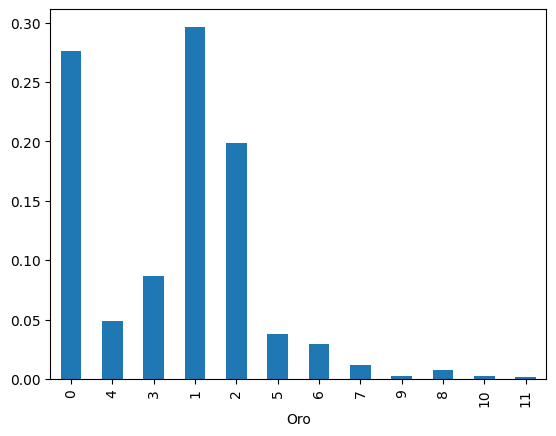

In [26]:
# con dati di tipo discreto la soluzione migliore è il grafico a barre. (o megli a bastonici, valuto però se sono troppo vicii)
gold_rel_freq.plot.bar()
plt.show()

Essendo però l'attributo di tipo numerico, si corre il rischio che ogni barra venga percepita come associata più a un intervallo di valori piuttosto che a un unico numero. Per evitare questo fraintendimento è più opportuno generare un grafico a bastoncini, come già fatto nel primo esercizio.

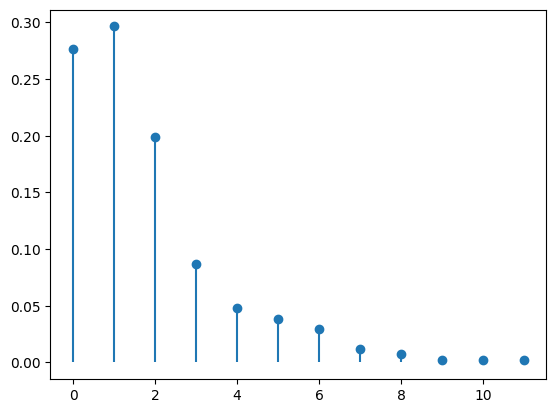

In [27]:
plt.vlines(gold_rel_freq.index, 0, gold_rel_freq.values)
plt.plot(gold_rel_freq.index, gold_rel_freq.values, 'o')
plt.show()

**2.7**
_La distribuzione delle frequenze osservata è compatibile con un modello di Poisson?_

Se si ordinano le frequenze rispetto a valori crescenti delle specificazioni, in un modello di Poisson si possono ottenere due andamenti: uno strettamente decrescente e uno in cui i valori crescono fino a un massimo per poi decrescere, e in ogni caso allontanandosi dal massimo si ha una diminuzione di carattere non lineare. Guardando il grafico generato nel punto precedente si vede come le frequenze studiate ricadano nel secondo dei casi possibili, per cui a una prima analisi i dati osservati non sono incompatibili con un modello di Poisson.

Per approfondire la questione possiamo calcolare media e varianza campionaria dell'attributo in questione:

In [28]:
acqua['Oro'].mean()

1.7224242424242424

In [29]:
acqua['Oro'].var()

3.4025896319164968

i due valori ottenuti sono sensibilmente diversi, mentre nel modello di Poisson media e varianza coincidono: pertanto dobbiamo confutare l'ipotesi di applicabilità di tale modello per l'attributo _Oro_.

**2.8**
_Si stimi il numero atteso di particelle di oro riscontrate in 5 litri di acqua._

Al punto precedente abbiamo già stimato il valore atteso del numero di particelle di oro calcolando la media campionaria sulla serie corrispondente, ottenendo un risultato approssimativamente uguale a 1.72.

In [39]:
acqua['Oro'].mean()

1.7224242424242424

**2.9**
_Sia $X$ la variabile casuale che conta il numero di particelle di oro riscontrate in 5 litri di acqua. Scrivere lo stimatore utilizzato al punto precedente, specificare la numerosità del campione a cui è applicato e dire se è uno stimatore non distorto._

Come indicato al punto precedente, lo stimatore utilizzato è la media campionaria. Denotando con $X$ la variabile aleatoria corrispondente alla popolazione, diventa naturale indicare un generico campione come una sequenza $X_1, \dots, X_n$, così che la forma generica dello stimatore diventa

$$ \overline X = \frac{1}{n} \sum_{i=1}^n X_i, $$

dove $n$ indica la numerosità del campione. Per poter dire quale sia il valore che abbiamo utilizzato per $n$ è necessario capire se vi siano oppure no dei valori mancanti per l'attributo _Oro_. A differenza di altre librerie per l'analisi dei dati, pandas infatti non propaga i valori mancanti per esempio quando si calcola la somma o la media di una serie. È quindi necessario valutare esplicitamente la presenza di valori mancanti, utilizzando la funzione `isnull` che accetta coma argomento una serie e ne restituisce una di dimensione equivalente i cui elementi sono `True` oppure `False` a seconda del fatto che il corrispondente elemento nella serie di partenza fosse oppure no un valore mancante. Se si somma la serie restituita, si ottiene una conversione implicita di `False` e `True` rispettivamente in zero e uno.

In [40]:
acqua['Oro'].isna().sum()

0

In [30]:
pd.isnull(acqua['Oro']).sum()

0

Il risultato nullo equivale quindi all'assenza di valori mancanti: ciò significa che la numerosità del campione utilizzato è pari al numero di casi del _dataset_. Nel punto 1 abbiamo visto che tale valore è pari a 1650.

Un modo più efficiente di verificare l'assenza di valori mancanti è quello di invocare sulla serie restituita da `pd.isnull` il metodo `any`, che restituisce `True` se almeno uno degli elementi è un valore equivalente a `True` e `False` altrimenti.

In [31]:
pd.isnull(acqua['Oro']).any()

False

Infine, sappiamo che la media campionaria è sempre uno stimatore non distorto per il valore atteso della popolazione.

**Esercizio 3**

Si svolgano i seguenti punti.

1. Si tracci un grafico opportuno per visualizzare la distribuzione della durezza dell'acqua.
2. La distribuzione delle frequenze osservata è compatibile con un modello normale? 
3. L'ufficio analisi chimiche ipotizza che ci sia una relazione tra la quantità di oro riscontrata e la durezza dell'acqua. Si produca un grafico e si calcoli un indice numerico per convincere il titolare della ditta che l'ipotesi è accettabile.
4. Che tipo di relazione avete riscontrato?
5. Osservando i grafici prodotti nei primi due punti di questo esercizio, ai chimici viene il sospetto che non tutte le sorgenti siano caratterizzate dalla stessa durezza media dell'acqua, e in particolare che nel dataset ci siano due gruppi distinti dal punto di vista della durezza dell'acqua. Si valuti se questa ipotesi è condivisibile.
6. Si calcoli la durezza media dell'acqua per ogni sorgente rappresentata nel dataset.
7. Dal punto precedente dovrebbe essere emerso che la sorgente 5 presenta una durezza dell'acqua nettamente inferiore a quella delle altre sorgenti, le quali invece hanno una durezza media abbastanza simile. Selezionate e memorizzate nella variabile `sorgente_5` gli attributi _Oro_ e _DurezzaAcqua_ soltanto della  sorgente 5; selezionate e memorizzate nella variabile `altre_sorgenti` i medesimi attributi per tutte le altre sorgenti.
8. Si stimi il numero atteso di particelle di oro riscontrate in 5 litri di acqua:
   - nel caso della sorgente 5;
   - per tutte le altre sorgenti.
9. La distribuzione delle frequenze osservate per la sorgente 5 è compatibile con un modello di Poisson?
10. La distribuzione delle frequenze osservate per le altre sorgenti è compatibile con un modello di Poisson?
11. Durante l'attività di filtraggio dalla sorgente 5, una particella di oro ha inceppato il dispositivo di filtraggio dell'acqua. Si calcoli la probabilità di non trovare altre particelle di oro nei prossimi 10 litri di acqua, dopo aver sbloccato il dispositivo.
12. Dal punto in cui il dispositivo applicato alla sorgente 5 ha individuato l'ultima particella di oro sono stati filtrati altri 5 litri di acqua senza trovare altro oro. Qual è la probabilità di non trovare oro ancora per i prossimi 10 litri di acqua?
13. Si tracci il grafico della funzione di ripartizione della variabile casuale $Y=$ "quantità di acqua da analizzare (espressa in litri) prima di incontrare la prossima particella di oro":
    - nel caso della sorgente 5;
    - per tutte le altre sorgenti.


**Svolgimento**

**3.1**
_Si tracci un grafico opportuno per visualizzare la distribuzione della durezza dell'acqua._

A differenza dell'attributo _Oro_, i valori per _DurezzaAcqua_ sono numeri reali, e quindi una descrizione grafica ragionevole richiede la generazione di un istogramma:

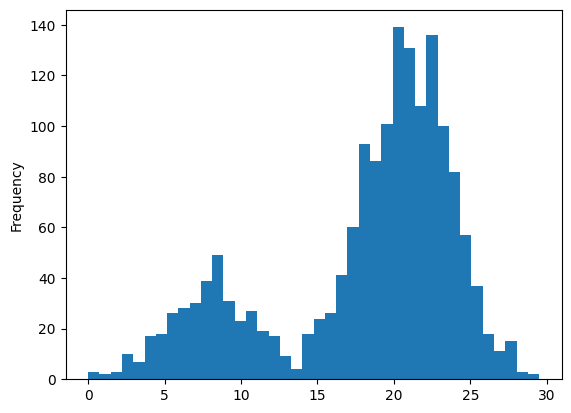

In [41]:
acqua['DurezzaAcqua'].plot.hist(bins=40) # senza aver specificato bins non sarebbe così chiaro e preciso
plt.show()

**3.2**
_La distribuzione delle frequenze osservata è compatibile con un modello normale?_

Dal grafico precedente si vede come l'istogramma abbia una forma bimodale, cioè con due massimi locali. Il modello normale è invece caratterizzato da una forma a campana. Pertanto i dati osservati non sono compatibili con una distribuzione normale. Possiamo approfondire l'analisi visualizzando il diagramma Q-Q per l'attributo e sovrapponendolo a una linea che indica la curva attesa in caso di normalità dei dati. Per fare ciò possiamo utilizzare la funzione `qqplot` del package `statmodels.api`:

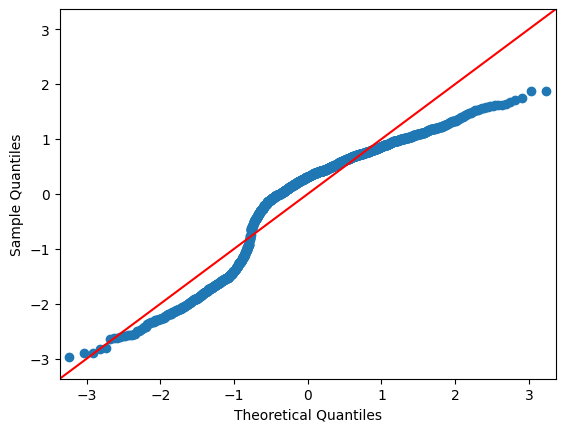

In [33]:
import statsmodels.api as sm

sm.qqplot(acqua['DurezzaAcqua'], fit=True, line='45')
plt.show()

Nel codice utilizzato, l'argomento `fit=True` indica di standardizzare i dati in modo che la curva attesa sia sovrapposta alla bisettrice del primo e del terzo quadrante, mentre `line='45'` specifica di visualizzare quest'ultima bisettrice. Dal grafico ottenuto si ottiene ulteriore conferma del fatto che il modello normale non sia compatibile con i dati rilevati per la durezza dell'acqua.

**3.3**
_L'ufficio analisi chimiche ipotizza che ci sia una relazione tra la quantità di oro riscontrata e la durezza dell'acqua. Si produca un grafico e si calcoli un indice numerico per convincere il titolare della ditta che l'ipotesi è accettabile._

Per valutare un'eventuale relazione tra i due attributi tracciamo il diagramma di dispersione corrispondente.

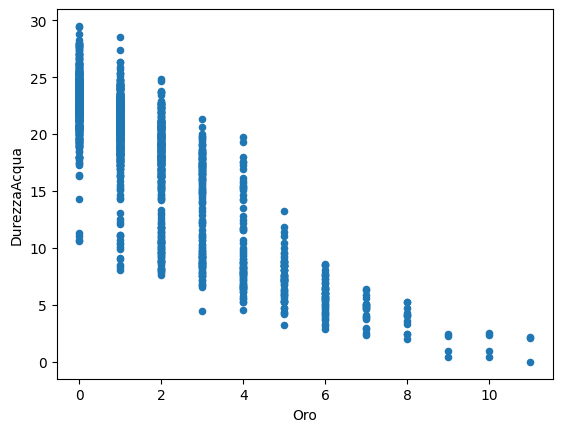

In [34]:
acqua.plot.scatter('Oro', 'DurezzaAcqua')
plt.show()
# l'organizzazione in colonne suggerisce che un attributo sia discreto (oro) ed uno continuo (DurezzaAcqua)

In effetti il grafico evidenzia una relazione di tipo inverso con un andamento di carattere lineare. Il coefficiente di correlazione lineare ci permette di quantificare la forza di questa relazione:

In [35]:
acqua['Oro'].corr(acqua['DurezzaAcqua'])

-0.8427686305078544

**3.4**
_Che tipo di relazione avete riscontrato?_

Il fatto che il coefficiente di correlazione sia sufficientemente vicino a -1 conferma che tra i due attributi sussista una relazione lineare di tipo inverso e di carattere abbastanza forte.

**3.5**
_Osservando i grafici prodotti nei primi due punti di questo esercizio, ai chimici viene il sospetto che non tutte le sorgenti siano caratterizzate dalla stessa durezza media dell'acqua, e in particolare che nel dataset ci siano due gruppi distinti dal punto di vista della durezza dell'acqua. Si valuti se questa ipotesi è condivisibile._

L'ipotesi che vi siano due gruppi distinti è corroborata dall'istogramma della durezza dell'acqua, che è interpretabile come la sovrapposizione di due campane.

**3.6**
_Si calcoli la durezza media dell'acqua per ogni sorgente rappresentata nel dataset._

Il metodo `groupby` permette di suddividere un _dataframe_ in gruppi diversi in funzione del valore assunto da un particolare attributo. Invocando il metodo `mean` sul risultato è possibile calcolare automaticamente la media per gli attributi restanti.

In [36]:
acqua.groupby('NomeSorgente').mean()

,Oro,DurezzaAcqua
NomeSorgente,,
Sorgente1,0.970000,21.009675
Sorgente2,1.048000,20.836725
Sorgente3,1.120000,20.696062
Sorgente4,1.068000,20.917371
Sorgente5,4.228571,7.754144


In [48]:
for n in acqua['NomeSorgente'].unique():
	mean = acqua.loc[acqua['NomeSorgente'] == n, 'DurezzaAcqua'].mean()
	print(n, mean)

Sorgente1 21.009674901476526
Sorgente2 20.836724995778464
Sorgente3 20.696062240171887
Sorgente4 20.917371192414336
Sorgente5 7.754144192699826


Dal risultato si vede come le prime quattro sorgenti abbiano valori molto vicini per la media dell'attributo _DurezzaAcqua_, mentre l'ultima media risulta sensibilmente minore.

Volendo si sarebbe potuto anche utilizzare un filtro, selezionando le righe del _dataset_ corrispondenti via via a una sorgente specifica per poi calcolare manualmente le singole medie.

In [49]:
acqua[acqua['NomeSorgente']=='Sorgente1']['Oro'].mean()

0.97

**3.7**
_Dal punto precedente dovrebbe essere emerso che la sorgente 5 presenta una durezza dell'acqua nettamente inferiore a quella delle altre sorgenti, le quali invece hanno una durezza media abbastanza simile. Selezionate e memorizzate nella variabile_ `sorgente_5` _gli attributi Oro e DurezzaAcqua soltanto della  sorgente 5; selezionate e memorizzate nella variabile_ `altre_sorgenti` _i medesimi attributi per tutte le altre sorgenti._

Utilizzando due filtri analoghi a quello visto nel punto precedente è possibile suddividere l'insieme dei dati in due _dataframe_, il primo corrispondente a `'Sorgente5'` e l'altro relativo alle sorgenti rimanenti.

In [52]:
sorgente_5 = acqua.loc[acqua['NomeSorgente']=='Sorgente5', 
                       ['Oro','DurezzaAcqua']]
altre_sorgenti = acqua.loc[acqua['NomeSorgente']!='Sorgente5',
                           ['Oro','DurezzaAcqua']]

sorgente_5

,Oro,DurezzaAcqua
1300,5,7.640821
1301,6,8.112598
1302,1,10.386547
1303,6,5.476011
1304,1,10.684413
...,...,...
1645,4,5.601863
1646,4,6.642368
1647,6,3.134170
1648,2,12.190175


**3.8**
_Si stimi il numero atteso di particelle di oro riscontrate in 5 litri di acqua nel caso della sorgente 5 e per tutte le altre sorgenti._

Le stime richieste si ottengono facilmente selezionando dai due _dataframe_ ottenuti al punto precedente l'attributo _Oro_ e calcolando le rispettive medie campionarie. Salviamo la stima relativa alla sorgente 5 in una variabile `num_particelle_5` (ci sarà utile a fine esercizio).

In [ ]:
num_particelle_5 = sorgente_5['Oro'].mean()
num_particelle_5

4.228571428571429

In [ ]:
altre_sorgenti['Oro'].mean()

1.0476923076923077

**3.9**
_La distribuzione delle frequenze osservate per la sorgente 5 è compatibile con un modello di Poisson?_

Riutilizziamo le stesse tecniche dell'esercizio 2.7. Visualizziamo innanzitutto il grafico delle frequenze.

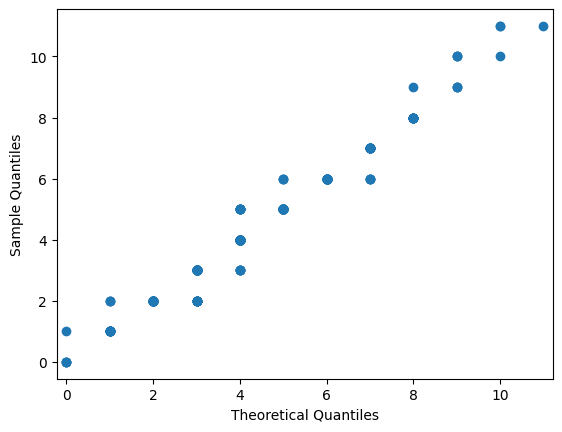

In [53]:
import statsmodels.api as sm

lambda_ = sorgente_5['Oro'].mean()

sm.qqplot(sorgente_5['Oro'], dist= st.poisson(lambda_))
plt.show()

/home/malchiodi/share/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/malchiodi/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


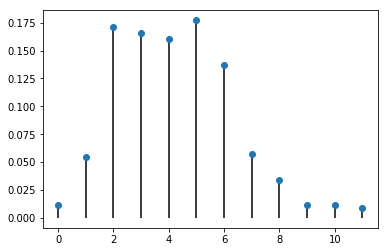

In [ ]:
s5_rel_freq = sorgente_5['Oro'].value_counts(normalize=True, sort=False)
plt.vlines(s5_rel_freq.index, [0]*len(s5_rel_freq), s5_rel_freq.values)
plt.plot(s5_rel_freq.index, s5_rel_freq.values, 'o')
plt.show()

L'andamento unimodale è compatibile con il modello di Poisson; tale ipotesi è rafforzata dal fatto che stimando la media e la varianza si ottengono valori molto vicini tra loro:

In [ ]:
(sorgente_5['Oro'].mean(), sorgente_5['Oro'].var())

(4.228571428571429, 4.38886614817847)

**3.10**
_La distribuzione delle frequenze osservate per le altre sorgenti è compatibile con un modello di Poisson_

Riapplichiamo la tecnica vista al punto precedente ma considerando ora le altre sorgenti.

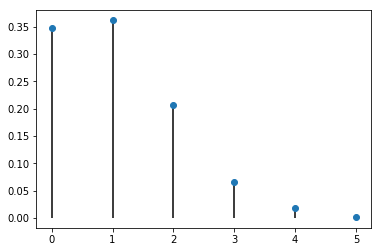

In [ ]:
altre_rel_freq = altre_sorgenti['Oro'].value_counts(normalize=True, sort=False)
plt.vlines(altre_rel_freq.index, [0]*len(altre_rel_freq), altre_rel_freq.values)
plt.plot(altre_rel_freq.index, altre_rel_freq.values, 'o')
plt.show()

Il grafico delle frequenze ha un andamento inizialmente crescente e poi decrescente. Le stime di media e varianza sono invece pari a

In [ ]:
(altre_sorgenti['Oro'].mean(), altre_sorgenti['Oro'].var())

(1.0476923076923077, 0.9923349321963675)

Quindi anche per le altre sorgenti i dati osservati sono compatibili con un modello di Poisson.

**3.11**
_Durante l'attività di filtraggio dalla sorgente 5, una particella di oro ha inceppato il dispositivo di filtraggio dell'acqua. Si calcoli la probabilità di non trovare altre particelle di oro nei prossimi 10 litri di acqua, dopo aver sbloccato il dispositivo._

Siccome il numero $X$ di particelle d'oro per cinque litri di acqua provenienti dalla sorgente 5 è descrivibile tramite un modello di Poisson, la quantità di litri di acqua da analizzare tra due scoperte successive di una particella è descrivibile tramite una legge esponenziale di parametro uguale al valore atteso di $X$ diviso per 5. Noi non conosciamo il valore atteso di $X$, ma lo abbiamo già stimato e a partire da tale stima possiamo ottenerne una per il parametro della legge esponenziale che ci interessa.

In [ ]:
l_5 = sorgente_5['Oro'].mean()/5
l_5

0.8457142857142858

Ora, indicata con $T$ la variabile aleatoria che corrisponde alla quantità di litri d'acqua da analizzare prima di trovare la prossima particella di oro, la probabilità di non trovare particelle nei prossimi dieci litri sarà pari a

$$\mathrm P(T > 10) = 1 -  \mathrm P(T \leq 10) = 1 - F_T(10)$$

Per calcolare questa probabilità possiamo utilizzare il package `scipy.stats`, che mette a disposizione una classe `expon` per le distribuzioni esponenziali. Per motivi che esulano da questa esercitazione, la sua istanziazione richiede però di passare come valore per l'argomento `scale` l'inverso del parametro considerato.

In [ ]:
T_5 = st.expon(scale=1/l_5) # per va continue devo specificare scale (dev standard nel caso esponenziale) e in altri casi anche loc

Il valore cercato sarà quindi pari a

In [ ]:
1 - T_5.cdf(10)

0.00021237799893225606

**3.12**
_Dal punto in cui il dispositivo applicato alla sorgente 5 ha individuato l'ultima particella di oro sono stati filtrati altri 5 litri di acqua senza trovare altro oro. Qual è la probabilità di non trovare oro ancora per i prossimi 10 litri di acqua?_

La proprietà di assenza di memoria della distribuzione esponenziale ci permette di dire che la probabilità che non si trovino particelle nei dieci litri che seguono l'ultima scoperta è uguale alla probabilità che i primi dieci litri analizzati quando è partito il macchinario non abbiano portato a trovare alcuna particella. Tale probabilità è quindi quella calcolata al punto precedente.

**3.13**
_Si tracci il grafico della funzione di ripartizione della variabile casuale $Y=$ "quantità di acqua da analizzare (espressa in litri) prima di incontrare la prossima particella di oro" nel caso della sorgente 5 e per tutte le altre sorgenti._

Per quanto visto ai punti precedenti, la variabile aleatoria $Y$ segue una legge esponenziale descritta dall'oggetto memorizzato in`T_5`. Il grafico della corrispondente funzione di ripartizione si ottiene nel modo seguente.

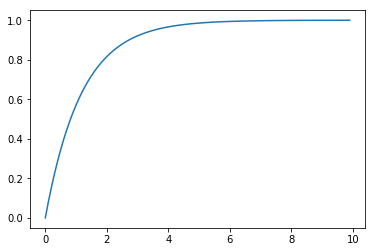

In [ ]:
import numpy as np

t = np.arange(0, 10, .1) # posso trovare l'estremo destro sempre passando per il quantile
plt.plot(t, T_5.cdf(t))
plt.show()

Per quanto riguarda le altre sorgenti, una volta verificata la validità dell'assunzione legata ai modelli di Poisson ed esponenziale (attività lasciata come esercizio) basta procedere in modo analogo a quanto visto sopra:

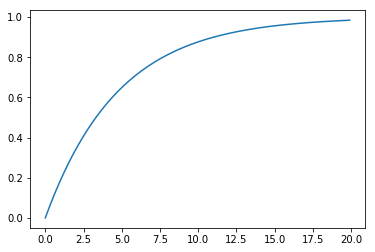

In [ ]:
l_altre = altre_sorgenti['Oro'].mean()/5
T_altre = st.expon(scale=1/l_altre)
t = np.arange(0, 20, .1)
plt.plot(t, T_altre.cdf(t))
plt.show()

**Esercizio 4**

Si svolgano i seguenti punti.

1. Secondo il titolare dell'azienda il valore atteso di particelle di oro riscontrate è abbastanza elevato da poter pensare di estrarre l'oro dall'acqua per venderlo. Prima di iniziare questa nuova attività è bene soppesare l'errore compiuto nella stima di tale parametro. Calcolare la probabilità che, per la sorgente 5, l'errore compiuto nella stima del valore atteso di particelle di oro riscontrate in 5 litri di acqua sia al più di 0.1 particelle, in eccesso o in difetto.
2. Quanti litri di acqua si dovrebbero ancora analizzare affinché la probabilità che, per la sorgente 5, l'errore compiuto nella stima del valore atteso di particelle di oro riscontrate in 5 litri di acqua sia al più di 0.1 particelle, in eccesso o in difetto sia almeno uguale a 0.9?
3. Per semplicità ipotizziamo che una particella estratta dalla sorgente 5 possa essere venduta a 5 euro e che il dispositivo per l'estrazione dell'oro abbia un costo fisso di 1000 euro. Stimare
   - il guadagno atteso nel caso in cui si voglia estrarre l'oro da 1000 litri di acqua.
   - la varianza del guadagno.

**Svolgimento**

**4.1**
_Secondo il titolare dell'azienda il valore atteso di particelle di oro riscontrate è abbastanza elevato da poter pensare di estrarre l'oro dall'acqua per venderlo. Prima di iniziare questa nuova attività è bene soppesare l'errore compiuto nella stima di tale parametro. Calcolare la probabilità che, per la sorgente 5, l'errore compiuto nella stima del valore atteso di particelle di oro riscontrate in 5 litri di acqua sia al più di 0.1 particelle, in eccesso o in difetto._

Indicando con $\overline X$ la media campionaria, con $\lambda$ il valore atteso che si vuole stimare e con $\sigma_X$ la deviazione standard della popolazione, fissato un generico $\epsilon > 0$ e applicando il teorema centrale del limite si ha:

\begin{align}
\mathrm P \left(\left|\overline X - \lambda \right| < \epsilon \right) =& \mathrm P \left(-\epsilon < \overline X - \lambda < \epsilon \right) \\
 =& \mathrm P\left(-\frac{\epsilon}{\frac{\sigma_X}{\sqrt{n}}} < \frac{\overline X - \lambda}{\frac{\sigma_X}{\sqrt{n}}} < \frac{\epsilon}{\frac{\sigma_X}{\sqrt{n}}}\right) \\
 \approx& \mathrm P\left(-\frac{\epsilon}{\frac{\sigma_X}{\sqrt{n}}} < Z < \frac{\epsilon}{\frac{\sigma_X}{\sqrt{n}}}\right) \\
 =& \Phi\left(\frac{\epsilon}{\frac{\sigma_X}{\sqrt{n}}}\right) - \Phi\left(-\frac{\epsilon}{\frac{\sigma_X}{\sqrt{n}}}\right) \\
 =& \Phi\left(\frac{\epsilon}{\frac{\sigma_X}{\sqrt{n}}}\right) - \left( 1 - \Phi\left(\frac{\epsilon}{\frac{\sigma_X}{\sqrt{n}}}\right) \right) \\
 =& 2 \Phi\left(\frac{\epsilon}{\frac{\sigma_X}{\sqrt{n}}}\right) - 1
\end{align}

Nel nostro caso $\epsilon = 0.1$, $n$ è pari al numero di casi del _dataframe_ memorizzato in `sorgente_5` e $\sigma_X$ può essere approssimato calcolando la deviazione standard campionaria:

In [ ]:
sigma_x = sorgente_5['Oro'].std()
eps = 0.1
n = len(sorgente_5)
n

350

Pertanto la risposta alla domanda è la seguente:

In [ ]:
Z = st.norm()
2 * Z.cdf(eps * n**0.5 / sigma_x) - 1

0.6281498695096628

**4.2**
_Quanti litri di acqua si dovrebbero ancora analizzare affinché la probabilità che, per la sorgente 5, l'errore compiuto nella stima del valore atteso di particelle di oro riscontrate in 5 litri di acqua sia al più di 0.1 particelle, in eccesso o in difetto sia almeno uguale a 0.9?_

A partire da quanto visto nel punto precedente dovrà essere

$$2 \Phi\left(\frac{\epsilon}{\frac{\sigma_X}{\sqrt{n}}}\right) - 1 > 0.9$$

e quindi

$$\Phi\left(\frac{\epsilon}{\frac{\sigma_X}{\sqrt{n}}}\right) > 0.95$$

Calcolando membro a membro l'inverso di $\Phi$ e risolvendo rispetto a $n$ si ottiene infine

$$ n > \left(\frac{\sigma_X}{\epsilon}\Phi^{-1}(0.95)\right)^2$$

Il calcolo di $\Phi^{-1}$ corrisponde al calcolo dei quantili, quindi possiamo ottenere il valore `n_0` che indica il numero minimo di osservazioni da effettuare nel modo seguente:

In [ ]:
n_0 = math.ceil((sigma_x / eps * Z.ppf(0.95))**2)
n_0

1188

Concludendo, sarà necessario effettuare ancora un numero di osservazioni pari a

In [ ]:
n_0 - len(sorgente_5)

838

che corrispondono a

In [ ]:
5 * (n_0 - len(sorgente_5))

4190

litri di acqua.

**4.3**
_Per semplicità ipotizziamo che una particella estratta dalla sorgente 5 possa essere venduta a 1.5 euro e che il dispositivo per l'estrazione dell'oro abbia un costo fisso di 1000 euro. Stimare il guadagno atteso nel caso in cui si voglia estrarre l'oro da 1000 litri di acqua e la varianza del guadagno._

\L'oro estratto in 1000 litri di acqua della sorgente 5 corrisponde a 200 analisi fatte ognuna su cinque litri, e quindi il numero di particelle corrispondenti è pari alla somma di 200 variabili poissoniane $X_1, \dots, X_{200}$ aventi tutte lo stesso parametro $\lambda$ (la cui stima abbiamo precedentemente memorizzato nella variabile `num_particelle_5`). Tale somma $N$ avrà ancora distribuzione poissoniana con parametro uguale a $200 \lambda$.

Il guadagno sarà quindi pari a $G = 1.5 \cdot N - 1000$ e dunque

$$\mathcal E(G) = 1.5 \mathcal E(N) - 1000 = 1.5 \cdot 200\lambda - 1000 = 100(3 \lambda - 10)$$

Possiamo stimare il guadagno atteso come

In [ ]:
100 * (3 * num_particelle_5 - 10)

268.57142857142867

La varianza di $G$ sarà invece uguale a

$$\mathrm{Var}(G) = 1.5^2 \mathrm{Var}(N) = 1.5^2 \cdot 200 \lambda$$

e possiamo stimare questo valore con

In [ ]:
var_g = 1.5**2 * 200 * num_particelle_5
var_g

1902.857142857143

il tutto corrisponde alla seguente deviazione standard

In [ ]:
var_g**0.5

43.62175079999819

<hr style="width: 90%;" align="left" />
<span style="font-size: 0.8rem;">D. Malchiodi, Superhero data science. Vol 1: probabilità e statistica: Ripasso, 2017.</span>
<br>
<span style="font-size: 0.8rem;">Powered by <img src="img/jupyter-logo.png" style="height: 1rem; display: inline; margin-left: 0.5ex; margin-top: 0;" alt="Jupyter Notebook"></span>
<div style="float: left; margin-top: 1ex;">
<img src="http://mirrors.creativecommons.org/presskit/icons/cc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/by.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nc.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<img src="http://mirrors.creativecommons.org/presskit/icons/nd.large.png" style="width: 1.5em; float: left; margin-right: 0.6ex; margin-top: 0;">
<span style="font-size: 0.7rem; line-height: 0.7rem; vertical-align: middle;">Quest'opera è distribuita con Licenza <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribuzione - Non commerciale - Non opere derivate 4.0 Internazionale</a></span>.
div>